In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pylab as plt

### Pandas datareader is a sub package that allows one to create a dataframe from various internet datasources, currently including: Yahoo! Finance. Google Finance etc

In [2]:
import pandas_datareader.data as web

In [5]:
# Ignore warnings. This is a temporary bug that should disappear in future versions of the libraries used here.
import warnings
warnings.filterwarnings("ignore")

## Loads the close price of given stock data from Yahoo! Finance from a specific date from history 

In [23]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2015, 10, 1)

tickers = {'Tesla': 'TSLA', 'Ford': 'F', 'Oil ETF': 'UGA', 'Apple': 'AAPL'}
prices = []

for company, tic in tickers.items(): 
    df = web.DataReader(tic, 'yahoo', start=start, end=end)[['Close']] # getting the closing price for those date 
    df.rename(columns={'Close': company}, inplace=True) # renaming the each retrieve price 'close' header to it specific company at the moment
    prices.append(df) # appending the bulk of historical data to the price list variable above

In [24]:
print(prices)

[                Tesla
Date                 
2010-06-29   4.778000
2010-06-30   4.766000
2010-07-01   4.392000
2010-07-02   3.840000
2010-07-06   3.222000
...               ...
2015-09-25  51.382000
2015-09-28  49.686001
2015-09-29  49.330002
2015-09-30  49.680000
2015-10-01  47.976002

[1325 rows x 1 columns],              Ford
Date             
2010-01-04  10.28
2010-01-05  10.96
2010-01-06  11.37
2010-01-07  11.66
2010-01-08  11.69
...           ...
2015-09-25  13.53
2015-09-28  13.12
2015-09-29  13.15
2015-09-30  13.57
2015-10-01  13.67

[1447 rows x 1 columns],               Oil ETF
Date                 
2010-01-04  37.470001
2010-01-05  37.810001
2010-01-06  37.900002
2010-01-07  37.889999
2010-01-08  38.380001
...               ...
2015-09-25  31.860001
2015-09-28  30.799999
2015-09-29  31.330000
2015-09-30  31.650000
2015-10-01  31.719999

[1447 rows x 1 columns],                 Apple
Date                 
2010-01-04   7.643214
2010-01-05   7.656428
2010-01-06   7.534643
2010-

In [68]:
# THIS FORMAT THE ARRAY TO A NEAT VIEW LIKE A TABLE
clean_prices = pd.concat(prices, axis=1)
print(clean_prices.head())

            Tesla   Ford    Oil ETF     Apple
Date                                         
2010-01-04    NaN  10.28  37.470001  7.643214
2010-01-05    NaN  10.96  37.810001  7.656428
2010-01-06    NaN  11.37  37.900002  7.534643
2010-01-07    NaN  11.66  37.889999  7.520714
2010-01-08    NaN  11.69  38.380001  7.570714


In [69]:
# clean_prices = clean_prices.fillna(0) #this clean the data and applied a missing value to those missing

In [70]:
clean_prices.head()

,Tesla,Ford,Oil ETF,Apple
Date,,,,
2010-01-04,NaN,10.28,37.470001,7.643214
2010-01-05,NaN,10.96,37.810001,7.656428
2010-01-06,NaN,11.37,37.900002,7.534643
2010-01-07,NaN,11.66,37.889999,7.520714
2010-01-08,NaN,11.69,38.380001,7.570714


#### Let's check the primitive statistics

In [71]:
clean_prices.describe()

,Tesla,Ford,Oil ETF,Apple
count,1325.000000,1447.000000,1447.000000,1447.000000
mean,21.738125,13.865107,48.714064,18.372795
std,18.550167,2.380976,9.983608,6.926061
min,3.160000,8.920000,28.530001,6.858929
25%,5.666000,11.790000,38.404999,12.569107
50%,7.480000,14.110000,50.360001,17.950001
75%,41.164001,15.845000,57.299999,23.037143
max,57.208000,18.790001,65.709999,33.250000


#### Visualizing the stock trend for comparition

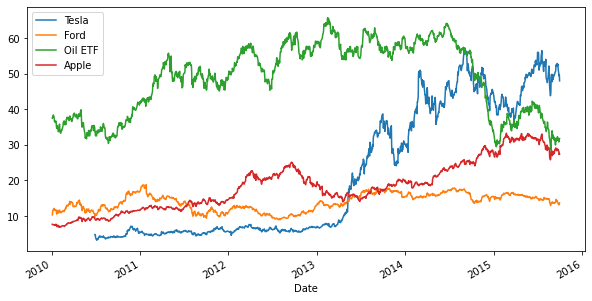

In [72]:
clean_prices.plot(figsize=(10, 5)) # figsize increases the size to width of 10 and height of 5
plt.show()

#### Configuring the movement trends for each stock in different plot with the layout of one row four columns

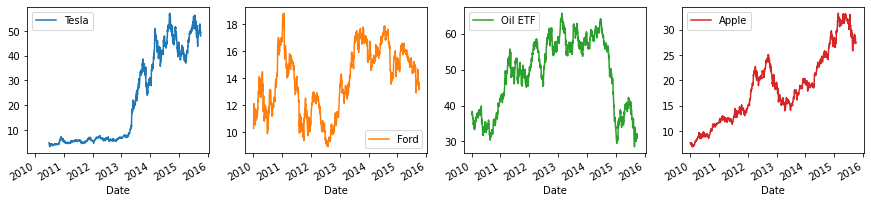

In [73]:
clean_prices.plot(figsize=(15, 3), subplots=True, layout=(1,4)) 
plt.show()

#### % return lost, margins, cumulative return and all other investments accounting calculations can be done and visualize in form of graphs for proper insight after-ward